In [141]:
import sys

preprocessing_path = 'C:\\Users\\joshh\\Desktop\\Uni\\Soton Year 3\\COMP3200\\fake-news-profiling\\classifier\\preprocessing'
if preprocessing_path not in sys.path:
    sys.path.insert(1, preprocessing_path)

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import ipynb.fs.full.parse_datasets as datasets

# Parse the dataset

In [143]:
data = datasets.parse_dataset("datasets", "en", to_pandas=True)
truthful_tweets = data.loc[data['truth_value'] == '0'].iloc[:, 2:].values.flatten()
fake_tweets = data.loc[data['truth_value'] == '1'].iloc[:, 2:].values.flatten()

print("Number of truthful users:", int(len(truthful_tweets)/100))
print("Number of fake users:", int(len(fake_tweets)/100))

Number of truthful users: 150
Number of fake users: 150


In [144]:
data.head()

,author_id,truth_value,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,...,tweet_91,tweet_92,tweet_93,tweet_94,tweet_95,tweet_96,tweet_97,tweet_98,tweet_99,tweet_100
0,06ct0t68y1acizh9eow3g5rhancrppr8,1,Courteney Cox Recreates Classic Friends Scene ...,The Jonas Brothers Have Secret Concert Days Af...,Ariana Grande Sends Heartfelt Message to Her F...,7 of the Biggest Bombshells From Jordyn Woods'...,Fyre Festival's Andy King Spills New Details o...,Watch Travis Scott Take an Adorable Phone Call...,See What Tyler Henry Really Thinks About His K...,Kim Kardashian Says She Had ''One of the Best ...,...,It's Pauly D Like You've Never Seen Him Before...,Hailey Baldwin Sends Her ''Lover'' Justin Bieb...,You Won't Believe How Much Money Property Brot...,"You Have to See Nicki Minaj's $450,000 Rolls-R...",How Maddie Poppe and Caleb Lee Hutchinson Are ...,What Do the Kids of the Grey's Anatomy Cast Th...,Inside Nikki Bella's Romantic Date Night With ...,How Justin Bieber Celebrated His 25th Birthday...,Matthew McConaughey's 3 Stylish Kids Make a Ra...,Royal Bartender! Kate Middleton Pours a Pint o...
1,071nxc49ihpd0jlfmvn2lghtayy3b5n9,0,Amber Smith “Kandy Halloween: Return of the Ha...,Kourtney Kardashian Reveals Scott Disick 'Chec...,Serena Williams Steps Out at the 2019 Met Gala...,See the campiest looks from 2019 Met Gala pink...,Trouble in Paradise? Kris Jenner and Corey Gam...,Bethenny Frankel Wants To Sell SkinnyGirl Beca...,Everything Kim Kardashian Has Said About Surro...,Kim Kardashian Confirms 4th Baby Not Here Yet ...,...,Michelle Williams Fuels Reconciliation Rumors ...,Dream Kardashian Flaunts Her Long Curly Locks ...,Charlize Theron Finally Addresses Her Rumored ...,Scott Disick Doesn’t Want To ‘Disrespect’ Sofi...,Kim Kardashian Lobbying for Systematic Change ...,Cardi B and Nicki Minaj Both Hit Met Gala Red ...,Jennifer Lopez and Alex Rodriguez Step Out for...,Jessie J Puts Her Misspelled Tattoo on Display...,Meghan Markle Gives Birth To Baby Boy! #URL#,Amy Schumer Cradles Up to Newborn Son Gene In ...
2,09py5qescynpnnckmzueqzr2y49moh1o,0,Rachel Bilson Was Asked Point-Blank if She’s D...,Bill Hader and Rachel Bilson make red carpet d...,What Do The Stars Say About Rachel Bilson? (12...,Celebrities front row at NYFW 2020 - Page Six ...,Rachel Bilson dating Bill Hader? - Arizona Dai...,Bill Hader and Rachel Bilson Confirm Relations...,How Did Rachel Bilson and Bill Hader Meet? - Y...,Rachel Bilson’s Golden Highlights Made For The...,...,Rachel Bilson On Helping La Marca Prosecco Lau...,Now This Is an Unexpected Couple - The Cut #UR...,"Love That O.C. Reunion Pic? Well, We've Got So...",Is Rachel Bilson Loved or Hated? New Analysis ...,Never Forget When Bill Hader Parodied Rachel B...,Bill Hader and Rachel Bilson made their red ca...,Rachel Bilson shops for home furnishings and g...,"Hold Up, Are Rachel Bilson and Bill Hader a Co...","Bill Hader, Rachel Bilson continue to fuel rum...",New couple alert! Bill Hader takes Rachel Bils...
3,0dwovd7nj6yg9m795ng2c629me0ccmrh,0,RT #USER#: The Public Relations Officer For Zo...,Supreme Court Nullifies APC’s Victory In The B...,"RT #USER#: Great Tension In #USER#, As Supreme...",RT #USER#: Some Evil Politicians Hired And Pai...,"RT #USER#: Presidency Raises Alarm, Accuses #U...",RT #USER#: Supreme Court Nullifies #USER#’s Vi...,"$308 Million Abacha Loot!!! America Blows Hot,...",RT #USER#: Bayelsa!!! #USER# Defends Recent Su...,...,Suspected APC Supporters Unleash Violence In B...,RT #USER#: Oshiomhole Ordered To Resign As APC...,RT #USER#: The Director Of Public Relations An...,"RT #USER#: Adams Oshiomhole, The New Chief Jus...","RT #USER#: The #USER#, Has On Friday, Announce...",RT #USER#: Be To Combat Criminals In The South...,"RT #USER#: Tears, As #USER# Receives News Of H...",RT #USER#: INEC To Go Back To Its Operations D...,"Trouble, As Boko Haram Rejects The Payment Of ...","RT #USER#: #HASHTAG#: An Official Of #USER#, E..."
4,0ibi364m7i7l01xi4xqafyathrmrrnll,

# Data analysis

In [145]:
import re
import string
from xml.sax.saxutils import unescape
import demoji
import numpy as np
from bs4 import BeautifulSoup
from unidecode import unidecode

### Tweet lengths (characters)

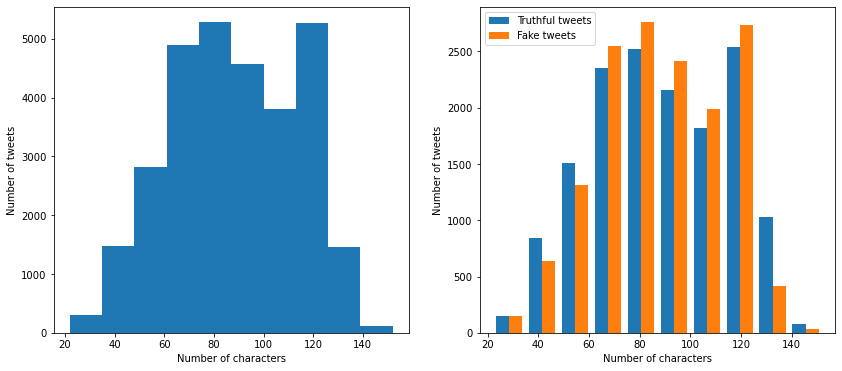

In [146]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

# All tweets plot
tweet_lengths = list(map(len, data.iloc[:, 2:].values.flatten()))
ax[0].hist(tweet_lengths)
ax[0].set_ylabel("Number of tweets")
ax[0].set_xlabel("Number of characters")

# Truth label plot
truthful_tweet_lengths = list(map(len, truthful_tweets))
fake_tweet_lengths = list(map(len, fake_tweets))

ax[1].hist((truthful_tweet_lengths, fake_tweet_lengths), label=("Truthful tweets", "Fake tweets"))
ax[1].set_ylabel("Number of tweets")
ax[1].set_xlabel("Number of characters")
ax[1].legend()

In [147]:
print("Shortest tweet length (characters): ", min(tweet_lengths))
print("Average tweet length (characters):", int(sum(tweet_lengths)/len(tweet_lengths)))
print("Longest tweet length (characters): ", max(tweet_lengths))

Shortest tweet length (characters):  22
Average tweet length (characters): 88
Longest tweet length (characters):  152


### Tweet lengths (words)

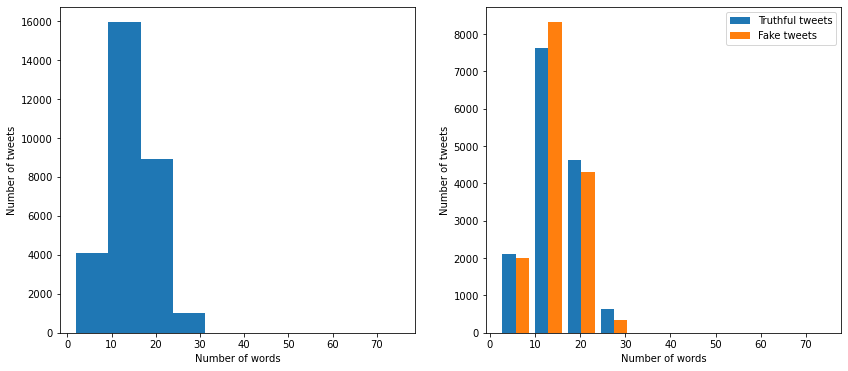

In [148]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

# All tweets plot
tweet_words = [tweet.split(" ") for tweet in data.iloc[:, 2:].values.flatten()]
tweet_lengths = list(map(len, tweet_words))
ax[0].hist(tweet_lengths)
ax[0].set_ylabel("Number of tweets")
ax[0].set_xlabel("Number of words")

# Truth label plot
truthful_tweet_lengths = [len(tweet.split(" ")) for tweet in truthful_tweets]
fake_tweet_lengths = [len(tweet.split(" ")) for tweet in fake_tweets]

ax[1].hist((truthful_tweet_lengths, fake_tweet_lengths), label=("Truthful tweets", "Fake tweets"))
ax[1].set_ylabel("Number of tweets")
ax[1].set_xlabel("Number of words")
ax[1].legend()

In [149]:
print("Shortest tweet length (words): ", min(tweet_lengths))
print("Average tweet length (words):", int(sum(tweet_lengths)/len(tweet_lengths)))
print("Longest tweet length (words): ", max(tweet_lengths))

Shortest tweet length (words):  2
Average tweet length (words): 14
Longest tweet length (words):  75


### Frequent words

In [162]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
from colour import Color

In [151]:
# Get all words and remove punctuation
def remove_punc(word):
    punc = set(string.punctuation)
    prin = set(string.printable)
    punc.remove("#")
    return "".join(c.lower() for c in word if c not in punc and c in prin)

all_words = [word for tweet in tweet_words for word in tweet]
all_words_no_punc = list(filter(lambda word: len(word) > 0, [remove_punc(word) for word in all_words]))

In [163]:
# Frequency dict of words
freq = dict()
for word in all_words_no_punc:
    if word in freq:
        freq[word] += 1
    else:
        freq[word] = 1

# Remove stopwords
english_stopwords = set([remove_punc(word) for word in stopwords.words('english')])
for word in english_stopwords:
    if word in freq:
        freq.pop(word)

# Count the number of words in a list of tweets
def count_words(tweets):
    words = [word for tweet in tweets for word in remove_punc(tweet).split(" ")]
    word_freq = dict()
    for word in words:
        if word not in english_stopwords:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1
    
    return word_freq

truthful_freq = count_words(truthful_tweets)
fake_freq = count_words(fake_tweets)

color_map = dict()
for k, v in truthful_freq.items():
    other_v = fake_freq[k] if k in fake_freq else 0
    color_map[k] = v/(v+other_v)

def color_map_func(word, **kwargs):
    color_val = color_map[word] if word in color_map else 0
    return Color(rgb=(1-color_val, color_val, 0)).hex

Text(0.5, 1.0, 'Wordcloud of tweets, blue words are used more by\n truthful users, red words are used more by fake users')

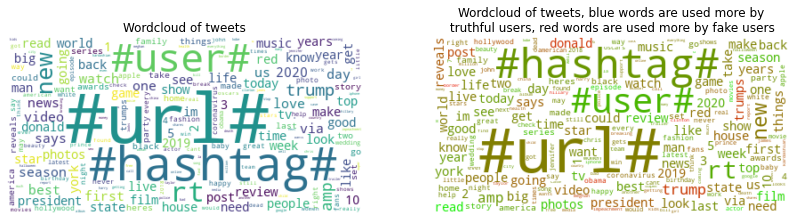

In [165]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 8))

wc = WordCloud(background_color="white")
wc.fit_words(freq)
ax[0].imshow(wc, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("Wordcloud of tweets")

wc = WordCloud(background_color="white", color_func=color_map_func)
wc.fit_words(freq)
ax[1].imshow(wc, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("Wordcloud of tweets, blue words are used more by\n truthful users, red words are used more by fake users")

In [166]:
ordered_words = [k for k, v in sorted(freq.items(), key=lambda i: i[1], reverse=True)]
print("Top 10 most popular words (excluding stopwords):")
print(ordered_words[:10])

Top 10 most popular words (excluding stopwords):
['#url#', '#hashtag#', '#user#', 'rt', 'new', 'trump', 'amp', 'news', 'via', 'us']


In [167]:
freq = dict()
for word in all_words:
    if word in freq:
        freq[word] += 1
    else:
        freq[word] = 1

sorted_words_with_punc = [k for k, v in sorted(freq.items(), key=lambda i: i[1], reverse=True)]
print("Top 10 least popular words (including stopwords and punctuation):")
print(sorted_words_with_punc[-10:-1])

Top 10 least popular words (including stopwords and punctuation):
['Wishes"', 'Michael:', 'Biopic:', 'Focuses', 'Whi...', 'Decapitated', '"Long', 'care"', "we'v..."]


### Basic sentiment

According to vaderSentiment:
* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

Average compound sentiment: 0.06718253333333296
Average compound sentiment for truthful tweets: 0.11295909333333276
Average compound sentiment for fake tweets: 0.021405973333333342


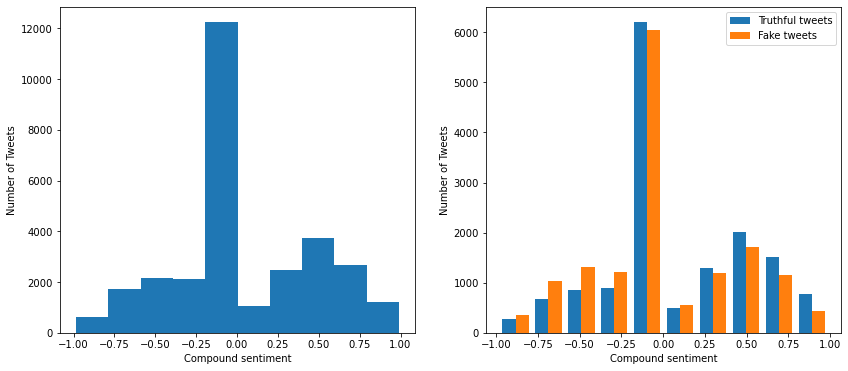

In [168]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

compound_sentiment = [sentiment_analyser.polarity_scores(tweet)['compound'] for tweet in data.iloc[:, 2:].values.flatten()]
ax[0].hist(compound_sentiment)
ax[0].set_ylabel("Number of Tweets")
ax[0].set_xlabel("Compound sentiment")

truthful_compound_sentiment = [sentiment_analyser.polarity_scores(tweet)['compound'] for tweet in truthful_tweets]
fake_compound_sentiment = [sentiment_analyser.polarity_scores(tweet)['compound'] for tweet in fake_tweets]
ax[1].hist((truthful_compound_sentiment, fake_compound_sentiment), label=("Truthful tweets", "Fake tweets"))
ax[1].set_ylabel("Number of Tweets")
ax[1].set_xlabel("Compound sentiment")
ax[1].legend()

print("Average compound sentiment:", sum(compound_sentiment)/len(compound_sentiment))
print("Average compound sentiment for truthful tweets:", sum(truthful_compound_sentiment)/len(truthful_compound_sentiment))
print("Average compound sentiment for fake tweets:", sum(fake_compound_sentiment)/len(fake_compound_sentiment))

### Letter casing

In [169]:
tags = set(['HASHTAG', 'URL', 'USER'])
def extract_words(tweets):
    def remove_punc_keep_case(word):
        punc = set(string.punctuation)
        prin = set(string.printable)
        return "".join(c for c in word if c not in punc and c in prin)

    words = [word for tweet in tweets for word in remove_punc_keep_case(tweet).split(" ")]
    return list(filter(lambda word: word not in tags, words)) # remove tags


truthful_words = extract_words(truthful_tweets)
fake_words = extract_words(fake_tweets)

In [170]:
# Ratio of upper-case letters used in tweets
truthful_upper = sum([1 if c.isupper() else 0 for word in truthful_words for c in word])
fake_upper = sum([1 if c.isupper() else 0 for word in fake_words for c in word])

print("Truthful tweets ratio of upper-case letters:", 
      truthful_upper/sum([1 for tweet in truthful_tweets for c in tweet]))
print("Fake tweets ratio of upper-case letters:", 
      truthful_upper/sum([1 for tweet in fake_tweets for c in tweet]))

Truthful tweets ratio of upper-case letters: 0.0899909795975722
Fake tweets ratio of upper-case letters: 0.09047312344107451


In [171]:
# Ratio of upper-case words used in tweets
print("Truthful tweets ratio of upper-case words:", 
      sum([1 if re.match("[A-Z]{2,}", word) else 0 for word in truthful_words])/len(truthful_words))
print("Fake tweets ratio of upper-case words:", 
      sum([1 if re.match("[A-Z]{2,}", word) else 0 for word in fake_words])/len(fake_words))

Truthful tweets ratio of upper-case words: 0.04887253074916138
Fake tweets ratio of upper-case words: 0.04218846125772916


### Use of emojis

In [172]:
def count_emojis(user_tweets):
    count = 0
    for tweet in user_tweets:
        emojis_found = list(demoji.findall(tweet).keys())
        for emoji in emojis_found:
            count += len(re.findall(emoji, tweet))
    
    return count

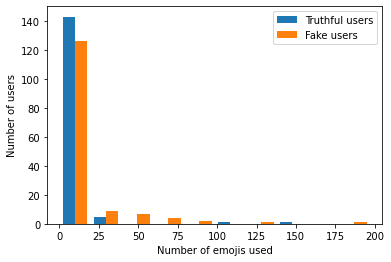

In [173]:
truthful_tweets_per_user = data.loc[data['truth_value'] == '1'].iloc[:, 2:].values
fake_tweets_per_user = data.loc[data['truth_value'] == '0'].iloc[:, 2:].values

emojis_per_truthful_user = [count_emojis(user_tweets) for user_tweets in truthful_tweets_per_user]
emojis_per_fake_user = [count_emojis(user_tweets) for user_tweets in fake_tweets_per_user]
plt.hist((emojis_per_truthful_user, emojis_per_fake_user), label=("Truthful users", "Fake users"))
plt.xlabel("Number of emojis used")
plt.ylabel("Number of users")
plt.legend()

### Punctuation

In [174]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sb

In [175]:
sentiment_analyser = SentimentIntensityAnalyzer()
user_tweets = data.iloc[0, 2:].values.flatten()
user_tweets_sent = [sentiment_analyser.polarity_scores(tweet)['compound'] for tweet in user_tweets]

<AxesSubplot:>

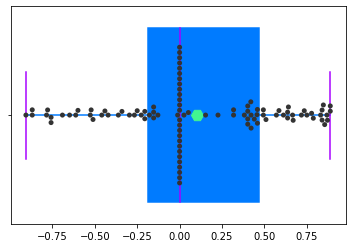

In [176]:
bp = sb.boxplot(x=user_tweets_sent,
               showmeans=True,
               whiskerprops=dict(color="#007bff"),
               flierprops=dict(color="#a600ff"),
               medianprops=dict(color="#a600ff"),
               meanprops=dict(
                   marker='H',
                   markeredgecolor='#42f590',
                   markerfacecolor='#42f590',
                   markersize=12,),
               boxprops=dict(color="#007bff"),
               capprops=dict(color="#a600ff"),
               )
sb.swarmplot(x=user_tweets_sent, color=".2")